# 1. Perkenalan

=================================================

Milestone 1

Nama  : Jyotis Sugata

Batch : HCK-31

## URL Dataset
https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard/data

## Problem
Tingkat pembatalan perjalanan (booking cancellation) menjadi masalah utama pada layanan ride-hailing. Pembatalan menyebabkan hilangnya potensi pendapatan, menurunkan kepuasan pelanggan, serta menambah beban operasional. 

## Latar Belakang
Dalam dataset, terdapat banyak kasus pembatalan baik oleh customer maupun driver, dengan alasan yang beragam (misalnya lokasi sulit dijangkau, waktu tunggu terlalu lama, perubahan rencana customer). Dengan memanfaatkan data historis booking, perusahaan bisa membangun model untuk memprediksi kemungkinan pembatalan.
Jika prediksi ini akurat, sistem dapat:
- Memberikan peringatan dini ke driver/customer.
- Menawarkan solusi preventif (misalnya armada alternatif, voucher diskon, atau prioritas driver).
- Mengurangi kerugian finansial sekaligus meningkatkan pengalaman pelanggan.


## Problem Statement
Tingkat pembatalan perjalanan pada layanan ride-hailing masih cukup tinggi, yang berdampak pada hilangnya pendapatan, meningkatnya waktu tunggu pelanggan, serta menurunnya kepuasan pengguna. Berdasarkan data historis booking, diperlukan sebuah sistem prediksi yang mampu mengidentifikasi kemungkinan pembatalan, dengan harapan tingkat pembatalan booking ditargetkan turun dari 25% menjadi maksimal 20% setelah implementasi rekomendasi berbasis prediksi.

Melalui langkah-langkah eksplorasi data, feature engineering, dan pengembangan model klasifikasi, sistem ini diharapkan dapat memberikan peringatan dini terhadap risiko pembatalan. Dengan demikian, kualitas layanan dapat meningkat, efisiensi operasional lebih baik, dan kepuasan pelanggan terjaga. Semua ini diharapkan dapat tercapai dalam waktu 1 tahun

## Target Audience
- Manajemen operasional → untuk strategi penempatan driver dan promosi.
- Tim product & data → untuk implementasi model prediksi dalam aplikasi.
- Driver → untuk mendapatkan order yang lebih stabil dan minim risiko cancel

=================================================

# 2. Import Libraries

install category-encoders untuk membantu melakukan encoding kategori

In [1]:
# Library for dataframe and manipulation
import pandas as pd
import numpy as np

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import spearmanr, pearsonr, chi2_contingency
from sklearn.pipeline import Pipeline, make_pipeline

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation and Parameter Tuning
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import recall_score, precision_score, roc_auc_score

# model saving
import pickle

# 3. Data Loading

In [2]:
df = pd.read_csv('P1M2_jyotis-sugata_dataset.csv')
df.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [4]:
# checking duplicate columns
df.duplicated().sum()   

0

tidak ada data duplikat

In [5]:
listItem = []
for col in df.columns:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Date,365,"[2024-03-23, 2024-11-29, 2024-08-23, 2024-10-2..."
1,Time,62910,"[12:29:38, 18:01:39, 08:56:10, 17:17:25, 22:08..."
2,Booking ID,148767,"[""CNR5884300"", ""CNR1326809"", ""CNR8494506"", ""CN..."
3,Booking Status,5,"[No Driver Found, Incomplete, Completed, Cance..."
4,Customer ID,148788,"[""CID1982111"", ""CID4604802"", ""CID9202816"", ""CI..."
5,Vehicle Type,7,"[eBike, Go Sedan, Auto, Premier Sedan, Bike, G..."
6,Pickup Location,176,"[Palam Vihar, Shastri Nagar, Khandsa, Central ..."
7,Drop Location,176,"[Jhilmil, Gurgaon Sector 56, Malviya Nagar, In..."
8,Avg VTAT,181,"[nan, 4.9, 13.4, 13.1, 5.3, 5.1, 7.1, 12.1, 6...."
9,Avg CTAT,351,"[nan, 14.0, 25.8, 28.5, 19.6, 18.1, 20.4, 16.5..."


In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


1. Date
- Tipe: Tanggal (object yang merepresentasikan format yyyy-mm-dd, bisa diubah ke datetime)
- Dianggap Numerik kontinu
- Nilai unik: 365 (satu tahun data)
- Menunjukkan tanggal pemesanan dibuat.

2. Time
- Tipe: Waktu (object string hh:mm:ss)
- Dianggap Numerik kontinu
- Nilai unik: 62 910 (bervariasi tiap detik/menit)
- Jam transaksi dilakukan.

3. Booking ID
- Identifier unik, nilai hampir sama dengan jumlah baris (148 767 unik untuk 150 000 baris)
- Menandai setiap pesanan secara individual.

4. Booking Status
- Kategorikal Nominal (5 kategori: Completed, Cancelled by Customer, Cancelled by Driver, Incomplete, No Driver Found)
- Status akhir tiap pemesanan.

5. Customer ID
- Identifier unik pelanggan (148 788 unik)
- Menghubungkan pemesanan ke pelanggan tertentu.

6. Vehicle Type
- Kategorikal Nominal (7 jenis: eBike, Go Sedan, Auto, Premier Sedan, Bike, Go Mini, UberXL)
- Jenis kendaraan yang dipilih pelanggan.

7. Pickup Location
- Kategorikal Nominal (176 lokasi unik)
- Lokasi awal perjalanan.

8. Drop Location
- Kategorikal Nominal (176 lokasi unik)
- Lokasi tujuan perjalanan.

9. Avg VTAT (Vehicle Turnaround / Arrival Time)
- Numerik kontinu (float)
- Range ~2–20 menit (mean 8,46)
- Estimasi rata-rata waktu pengemudi sampai ke titik jemput.

10. Avg CTAT (Customer Trip Arrival Time)
- Numerik kontinu (float)
- Range ~10–45 menit (mean 29,1)
- Rata-rata lama perjalanan dari jemput ke tujuan.

11. Cancelled Rides by Customer
- Biner (1 menandakan pembatalan oleh pelanggan, NaN jika tidak)
- Flag bahwa pesanan dibatalkan pelanggan.

12. Reason for cancelling by Customer
- Kategorikal Nominal (5 nilai: “Driver not moving toward pickup”, “Changed my mind”, dll.)
- Alasan pelanggan membatalkan.

13. Cancelled Rides by Driver
- Biner (1 jika dibatalkan pengemudi)
- Flag pembatalan oleh pengemudi.

14. Driver Cancellation Reason
- Kategorikal Nominal (4 alasan: “Personal & Car issues”, “Customer unreachable”, dsb.)
- Alasan pembatalan oleh pengemudi.

15. Incomplete Rides
- Biner (1 menandakan perjalanan tidak selesai)
- Flag perjalanan yang tidak sampai tujuan.

16. Incomplete Rides Reason
- Kategorikal Nominal (3 nilai: Vehicle Breakdown, Other Issue, Customer Issue)
- Penyebab perjalanan tidak selesai.

17. Booking Value
- Numerik kontinu (float)
- Range 50 – 4 277 (mean ~508)
- Nilai total ongkos yang dibebankan.

18. Ride Distance
- Numerik kontinu (float)
- Range 1 – 50 km (mean ~24,6 km)
- Jarak tempuh perjalanan.

19. Driver Ratings
- Numerik kontinu (skala 1–5, mean ~4,23)
- Nilai yang diberikan pelanggan ke pengemudi.

20. Customer Rating
- Numerik kontinu (skala 1–5, mean ~4,40)
- Nilai yang diberikan pengemudi ke pelanggan.

21. Payment Method
- Kategorikal Nominal (5 opsi: UPI, Cash, Credit Card, Uber Wallet, Debit Card)
- Cara pembayaran yang digunakan.

In [7]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]

# Calculate percentage
missing_percent = (missing_values / len(df)) * 100

# Combine count and percentage 
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2),
})

print(missing_df)

                                   Missing Values  Percentage (%)
Avg VTAT                                    10500             7.0
Avg CTAT                                    48000            32.0
Cancelled Rides by Customer                139500            93.0
Reason for cancelling by Customer          139500            93.0
Cancelled Rides by Driver                  123000            82.0
Driver Cancellation Reason                 123000            82.0
Incomplete Rides                           141000            94.0
Incomplete Rides Reason                    141000            94.0
Booking Value                               48000            32.0
Ride Distance                               48000            32.0
Driver Ratings                              57000            38.0
Customer Rating                             57000            38.0
Payment Method                              48000            32.0


terlihat ada banyak missing value pada beberapa kolom, ini akan dihandle pada saat Handling Missing Value

# 4. Exploratory Data Analysis (EDA)

#### 1. Apakah lokasi penjemputan dan pemberhentian mempengaruhi kemungkinan booking tidak menemukan driver? Sepuluh lokasi penjemputan dan pemberhentian mana yang mempunyai tingkat ```"No Driver Found"``` tertinggi di data ini?

In [8]:
df_eda = df.copy()

# tandai booking yang berstatus "No Driver Found"
df_eda["is_no_driver_found"] = df_eda["Booking Status"].apply(
    lambda x: 1 if x.strip().lower() == "no driver found" else 0
)

Buat kolom baru untuk mempermudah menentukan row mana yang berstatus No Driver Found

In [9]:
p_values = []
corrs = []
interpretasi = []
cols = []

for col in ["Pickup Location", "Drop Location"]:

  subset = df_eda[[col, "is_no_driver_found"]].dropna()
  corr_coef, p_value = spearmanr(subset[col], subset["is_no_driver_found"])

  p_values.append(p_value)
  corrs.append(corr_coef)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p value':p_values,
              'Correlation':corrs,
              'hasil': interpretasi})

,nama kolom,p value,Correlation,hasil
0,Pickup Location,0.438589,-0.002000,ga ada korelasi
1,Drop Location,0.856288,-0.000468,ga ada korelasi


Tidak ada korelasi antara Pickup Location dan Drop Location, dengan status No Driver Found

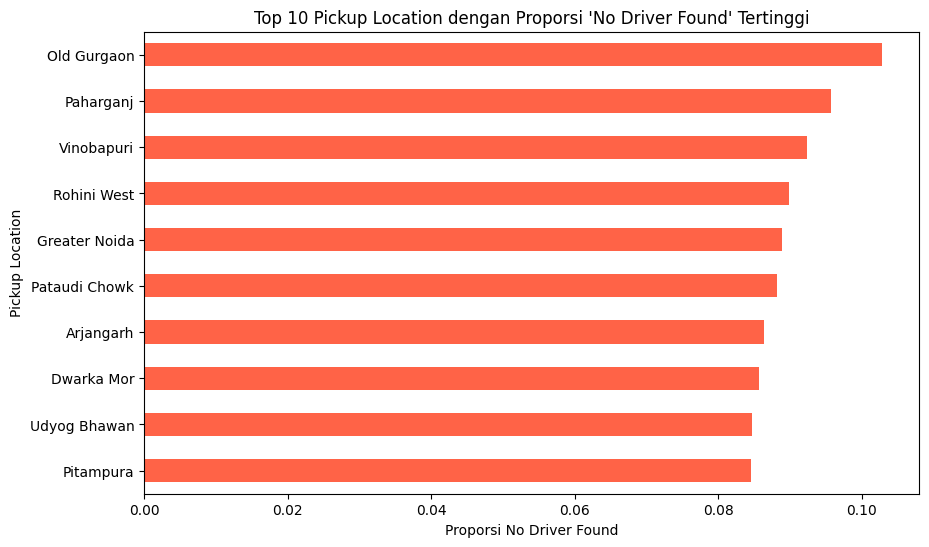

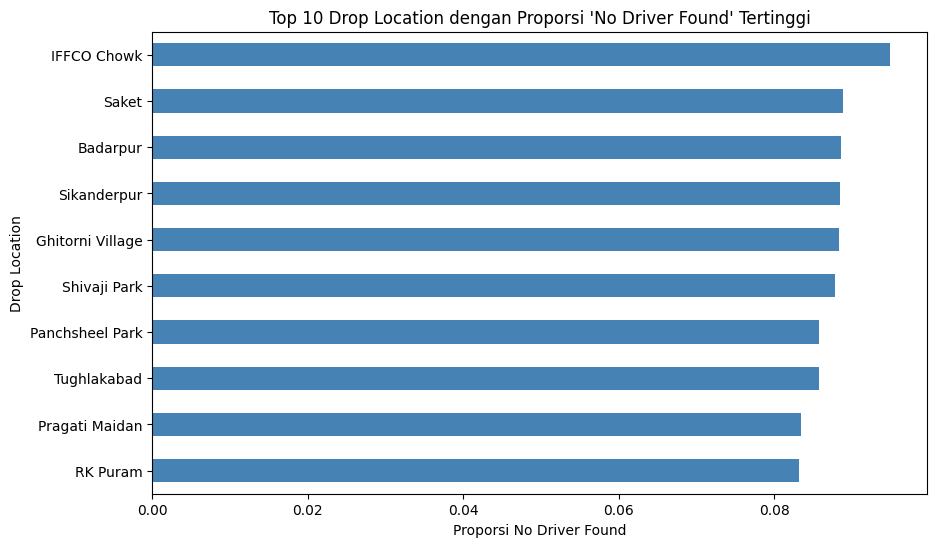

In [10]:
# cancel-rate khusus status "No Driver Found" per pickup
pickup_ndf_rate = df_eda.groupby("Pickup Location")["is_no_driver_found"].mean()

# ambil 10 pickup tertinggi
top10_pickup_ndf = pickup_ndf_rate.sort_values(ascending=False).head(10)

# drop location juga
drop_ndf_rate = df_eda.groupby("Drop Location")["is_no_driver_found"].mean()
top10_drop_ndf = drop_ndf_rate.sort_values(ascending=False).head(10)

# --- Pickup ---
plt.figure(figsize=(10,6))
top10_pickup_ndf.sort_values().plot(kind="barh", color="tomato")
plt.xlabel("Proporsi No Driver Found")
plt.title("Top 10 Pickup Location dengan Proporsi 'No Driver Found' Tertinggi")
plt.show()

# --- Drop ---
plt.figure(figsize=(10,6))
top10_drop_ndf.sort_values().plot(kind="barh", color="steelblue")
plt.xlabel("Proporsi No Driver Found")
plt.title("Top 10 Drop Location dengan Proporsi 'No Driver Found' Tertinggi")
plt.show()

Demikian hasil 10 lokasi teratas yang paling banyak mengalami "No Driver Found"

#### 2. Apakah lokasi penjemputan dan pemberhentian mempengaruhi kemungkinan booking di cancel? Sepuluh lokasi penjemputan dan pemberhentian mana yang mempunyai tingkat pembatalan tertinggi di data ini?

In [11]:
condition = (df_eda["Booking Status"] == "No Driver Found")
df_eda.drop(df_eda[condition].index, inplace=True)

jika tidak dapat menemukan driver, maka cancel tidak dapat dilakukan, maka perlu drop No Driver Found

In [12]:
df_eda["is_cancel"] = df_eda["Booking Status"].apply(
    lambda x: 0 if x.strip().lower() == "completed" else 1
)

buat kolom baru untuk menentukan apakah booking selesai atau tidak

In [13]:
pickup_cancel_rate = (
    df_eda.groupby("Pickup Location")["is_cancel"].mean()
)
pickup_cancel_rate.sort_values(ascending=False)

Pickup Location
Vinobapuri           0.397590
Akshardham           0.396154
Chhatarpur           0.370757
Pragati Maidan       0.367059
Badshahpur           0.365915
                       ...   
Sushant Lok          0.305063
Welcome              0.302267
Anand Vihar          0.300000
Gurgaon Sector 29    0.299868
Subhash Chowk        0.294545
Name: is_cancel, Length: 176, dtype: float64

terlihat bahwa daerah dengan kemungkinan cancel paling tinggi ada pada Vinobapuri, dan paling rendah ada pada Welcome.

In [14]:
df_eda["Pickup_TE"] = df_eda["Pickup Location"].map(pickup_cancel_rate)
df_eda.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_no_driver_found,is_cancel,Pickup_TE
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,1,0.322181
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,0,0,0.324324
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,416.0,34.02,4.6,5.0,UPI,0,0,0.332907
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,737.0,48.21,4.1,4.3,UPI,0,0,0.318681
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,316.0,4.85,4.1,4.6,UPI,0,0,0.342690


buat kolom baru untuk mempermudah prediksi dengan nama ``` Pickup_TE ```

In [15]:
destination_cancel_rate = (
    df_eda.groupby("Drop Location")["is_cancel"].mean()
)
destination_cancel_rate.sort_values(ascending=False)

Drop Location
Vasant Kunj           0.384615
Bhikaji Cama Place    0.377358
RK Puram              0.374055
Gurgaon Sector 29     0.370565
Keshav Puram          0.367684
                        ...   
Badarpur              0.296937
Sultanpur             0.294686
Lal Quila             0.294643
Noida Extension       0.286067
Preet Vihar           0.279070
Name: is_cancel, Length: 176, dtype: float64

terlihat bahwa daerah dengan kemungkinan cancel paling tinggi ada pada Vasant Kunj, dan paling rendah ada pada Preet Vihar.

In [16]:
df_eda["Drop_TE"] = df_eda["Drop Location"].map(pickup_cancel_rate)
df_eda.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_no_driver_found,is_cancel,Pickup_TE,Drop_TE
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,1,0.322181,0.325974
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,0,0,0.324324,0.336114
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,0,0,0.332907,0.328932
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,0,0,0.318681,0.352490
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,316.0,4.85,4.1,4.6,UPI,0,0,0.342690,0.365482


buat kolom baru untuk mempermudah prediksi dengan nama ``` Drop_TE ```

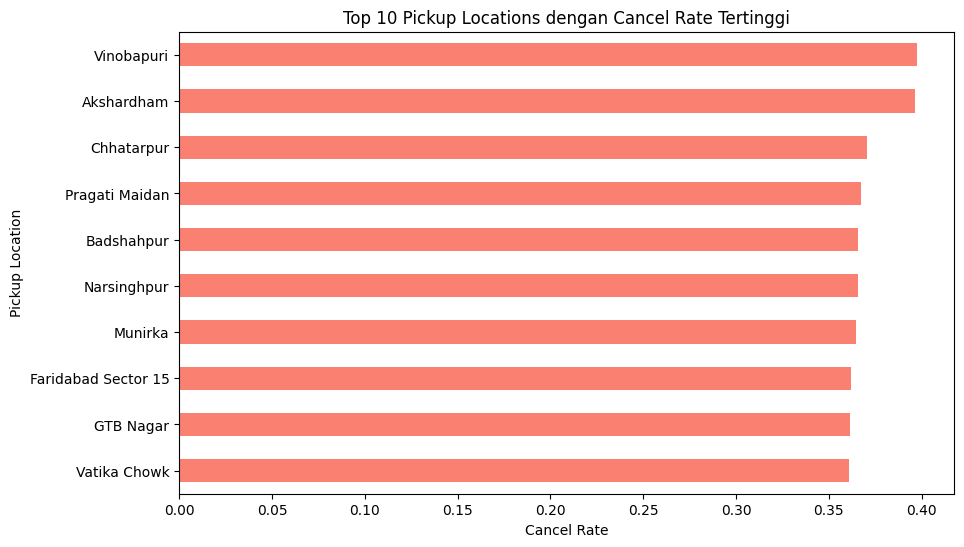

In [17]:
pickup_cancel_rate = df_eda.groupby("Pickup Location")["is_cancel"].mean()
top10_pickup = pickup_cancel_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top10_pickup.sort_values().plot(kind="barh", color="salmon")
plt.xlabel("Cancel Rate")
plt.title("Top 10 Pickup Locations dengan Cancel Rate Tertinggi")
plt.show()

Dari sini terlihat 10 tempat pickup dengan kemungkinan cancel paling tinggi

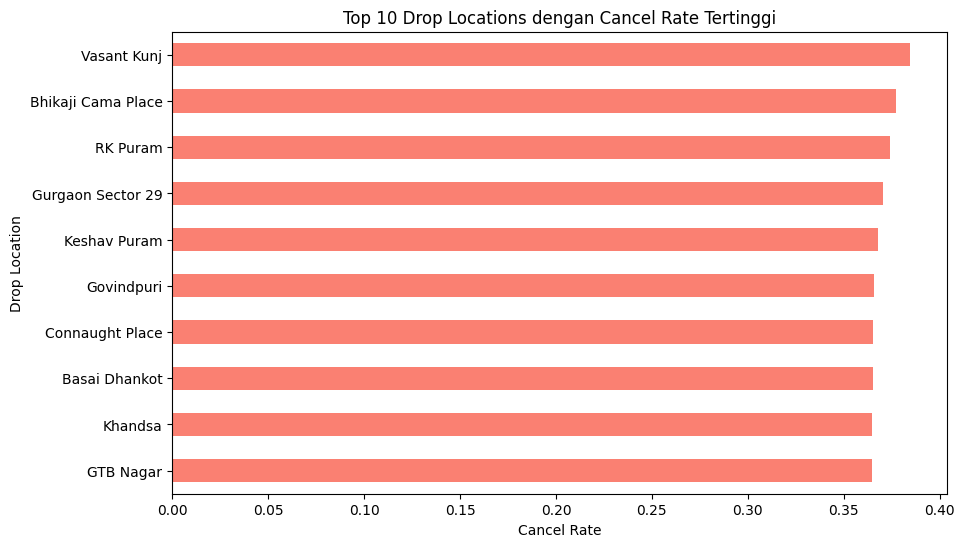

In [18]:
drop_cancel_rate = df_eda.groupby("Drop Location")["is_cancel"].mean()
top10_drop = drop_cancel_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top10_drop.sort_values().plot(kind="barh", color="salmon")
plt.xlabel("Cancel Rate")
plt.title("Top 10 Drop Locations dengan Cancel Rate Tertinggi")
plt.show()

Dari sini terlihat 10 tempat drop dengan kemungkinan cancel paling tinggi

#### 3. Apakah Vehicle Type mempengaruhi kemungkinan booking batal? Berapa persentase pembatalan pada masing-masing Vehicle Type?

In [19]:
p_values = []
corrs = []
interpretasi = []
cols = []

for col in ["Vehicle Type"]:

  subset = df_eda[[col, "is_cancel"]].dropna()
  corr_coef, p_value = spearmanr(subset[col], subset["is_cancel"])

  p_values.append(p_value)
  corrs.append(corr_coef)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p value':p_values,
              'Correlation':corrs,
              'hasil': interpretasi})

,nama kolom,p value,Correlation,hasil
0,Vehicle Type,0.958155,-0.00014,ga ada korelasi


Karena kolom ```Vehicle Type``` dan ```is_cancel``` adalah kolom kategorikal, maka digunakan spearmanr untuk menghitung korelasi

ternyata tidak ada korelasi antara ```Vehicle Type``` dan ```is_cancel```

In [20]:
cancel_rate_by_vehicle = (
    df_eda.groupby("Vehicle Type")["is_cancel"]
    .mean()
    .sort_values(ascending=False)
)

print(cancel_rate_by_vehicle)

Vehicle Type
Go Sedan         0.337755
Auto             0.333439
Go Mini          0.332554
eBike            0.332280
Bike             0.332160
Premier Sedan    0.331472
Uber XL          0.326802
Name: is_cancel, dtype: float64


#### 4. Apakah Vehicle Type mempengaruhi kemungkinan booking tidak selesai? Berapa persentase booking tidak selesai pada masing-masing Vehicle Type?

In [21]:
# buat kolom penanda 1 kalau booking tidak selesai, 0 kalau selesai
df_eda["is_not_completed"] = df_eda["Booking Status"].apply(
    lambda x: 0 if x.strip().lower() == "completed" else 1
)

buat kolom baru untuk mempermudah prediksi dengan nama ``` is_not_completed ```

In [22]:
p_values = []
corrs = []
interpretasi = []
cols = []

for col in ["Vehicle Type"]:

  subset = df_eda[[col, "is_not_completed"]].dropna()
  corr_coef, p_value = spearmanr(subset[col], subset["is_not_completed"])

  p_values.append(p_value)
  corrs.append(corr_coef)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p value':p_values,
              'Correlation':corrs,
              'hasil': interpretasi})

,nama kolom,p value,Correlation,hasil
0,Vehicle Type,0.958155,-0.00014,ga ada korelasi


Ternyata tidak ada korelasi antara Vehicle Type dengan status is_not_completed

In [23]:
not_completed_rate = (
    df_eda.groupby("Vehicle Type")["is_not_completed"]
    .mean()
    .sort_values(ascending=False)
)

print(not_completed_rate)

Vehicle Type
Go Sedan         0.337755
Auto             0.333439
Go Mini          0.332554
eBike            0.332280
Bike             0.332160
Premier Sedan    0.331472
Uber XL          0.326802
Name: is_not_completed, dtype: float64


#### 5. Apakah jam booking mempengaruhi kemungkinan pembatalan (cancel) order?

In [24]:
df_eda["Book_Hour"] = pd.to_datetime(df_eda["Time"], format="%H:%M:%S").dt.hour
df_eda["Book_Hour"] 

1         18
2          8
3         17
4         22
5          9
          ..
149995    19
149996    15
149997    10
149998     7
149999    15
Name: Book_Hour, Length: 139500, dtype: int32

kita perlu menambahkan tabel baru untuk menunjukan waktu booking dengan satuan jam untuk mempermudah analisa

In [25]:
summary = (
    df_eda.groupby("Book_Hour")["is_cancel"]
    .agg(['count', 'mean'])
    .rename(columns={'count':'Total Booking','mean':'Cancel Rate'})
    .reset_index()
)
summary.head()

,Book_Hour,Total Booking,Cancel Rate
0,0,1280,0.329688
1,1,1250,0.337600
2,2,1232,0.307630
3,3,1284,0.330218
4,4,1232,0.326299


lalu hitung jumlah order dan persentase cancel per jam

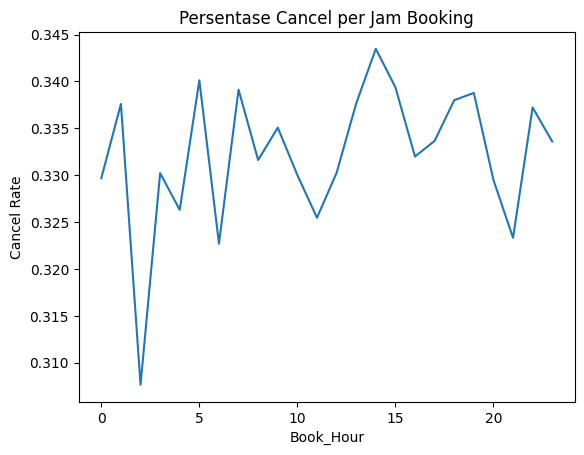

In [26]:
sns.lineplot(x="Book_Hour", y="Cancel Rate", data=summary)
plt.title("Persentase Cancel per Jam Booking")
plt.ylabel("Cancel Rate")
plt.show()

Terlihat kemungkinan cancel lebih tinggi pada waktu 14 siang, kemungkinan cancel lebih kecil pada waktu 2 subuh.

In [27]:
subset = df_eda[["Book_Hour", "is_cancel"]].dropna()
corr_coef, p_value = spearmanr(subset["Book_Hour"], subset["is_cancel"])

hasil = "ada korelasi" if p_value < 0.05 else "ga ada korelasi"
print(f"p value {p_value} Correlation {corr_coef} hasil {hasil}")

p value 0.5902511735367015 Correlation 0.001441716119456973 hasil ga ada korelasi


- menggunakan spearmanr untk menghitung korelasi dengan kolom is_cancel, jam booking tidak berhubungan signifikan dengan kemungkinan cancel.
- Cancel terjadi relatif merata sepanjang hari.
- Faktor lain (misalnya lokasi, tipe kendaraan, jarak perjalanan, harga, ketersediaan driver) kemungkinan lebih dominan dibanding jam booking.

Rekomendasi Bisnis

1. Tidak Perlu Membatasi Jam Booking
- Karena jam tidak berpengaruh, tidak ada dasar untuk memberikan perlakuan khusus per jam.

2. Fokus pada Faktor Lain
- Lokasi Penjemputan & Pemberhentian → perhatikan supply–demand driver.
- Vehicle Type & Tarif → apakah jenis kendaraan tertentu memicu cancel.
- Waktu Tunggu (CTAT/VTAT) → panjangnya waktu tunggu bisa jadi penyebab utama cancel.

3. Perbaikan Sistem Matching Driver
- Tingkatkan algoritme pencarian driver agar waktu tunggu lebih singkat, terutama di lokasi dengan cancel tinggi.
- Berikan insentif untuk driver agar tetap menerima order di area tertentu.

4. User Experience
- Informasi estimasi waktu tunggu yang lebih akurat dapat menurunkan cancel.
- Notifikasi follow-up ke customer jika waktu tunggu melebihi rata-rata.

# 5. Feature Engineering

## Split Betweet X (Features) and Y (target)

In [28]:
df_x = df_eda.drop(['is_cancel'], axis=1)
df_y = df_eda['is_cancel']
df_x.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_no_driver_found,Pickup_TE,Drop_TE,is_not_completed,Book_Hour
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,237.0,5.73,NaN,NaN,UPI,0,0.322181,0.325974,1,18
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,627.0,13.58,4.9,4.9,Debit Card,0,0.324324,0.336114,0,8
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,416.0,34.02,4.6,5.0,UPI,0,0.332907,0.328932,0,17
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,737.0,48.21,4.1,4.3,UPI,0,0.318681,0.352490,0,22
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,316.0,4.85,4.1,4.6,UPI,0,0.342690,0.365482,0,9


memisahkan kolom is_cancel dengan kolom lainnya, karena kolom is_cancel yang akan di prediksi sebagai targetnya

## Splitting between Train Set and Test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 9,)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (111600, 26)
Test Size (27900, 26)


data dipisah menjadi data train dan test dengan proporsi 80:20 menggunakan train_test_split. 111600 baris digunakan sebagai data train dan 27900 baris digunakan sebagai data test.

## Handling Cardinality

In [30]:
X_train.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method',
       'is_no_driver_found', 'Pickup_TE', 'Drop_TE', 'is_not_completed',
       'Book_Hour'],
      dtype='object')

Berikut kolom yang kita butuhkan :

1. Book_Hour
- Waktu booking bisa mempengaruhi ketersediaan driver / probabilitas cancel (jam sibuk vs sepi). kolom numerik tapi dianggap sebagai kategorikal numerik
- Perilaku Supply–Demand Bergantung Jam. Jam sibuk (pagi pergi kerja, sore pulang kantor) maka cancel/no driver lebih sering. Lainnya pada malam hari, driver lebih sedikit.

2. Vehicle Type
- Jenis kendaraan mempengaruhi supply dan demand.

3. Avg VTAT, Avg CTAT
- Waktu tunggu dan perjalanan rata-rata. Bisa indikasi kemudahan mendapatkan driver / kesabaran customer.

5. is_cancel
- kolom ini akan kita gunakan sebagai target

6. Ride Distance
- Kolom ini menggambarkan jarak tempuh kendaraan, bisa berpengaruh terhadap kemungkinan cancel

7. Booking Value
- Kolom ini menunjukan harga yang ditentukan untuk booking tersebut, bisa berpengaruh terhadap kemungkinan cancel

Berikut kolom yang tidak dibutuhkan :

1. Booking ID, Customer ID 
- kolom identifier dimana nilai berbeda pada setiap kolom, tidak perlu dipakai

2. Cancelled Rides by Customer, Cancelled Rides by Driver, Incomplete Rides 
- tidak perlu menggunakan ini karena sudah diwakilkan oleh kolom Booking Status

3. Reason for cancelling by Customer, Driver Cancellation Reason, Incomplete Rides Reason
- kita tidak perlu menganalisa alasan dari booking status

4. Date
- tanggal tidak mempengaruhi pembatalan booking

5. Driver Ratings, Customer Rating, Payment Method
- Kolom ini akan berisi None/Nan ketika booking di cancel, jadi tidak perlu diperhatikan

6. Pickup Location dan Drop Location
- kolom penunjuk tempat, ini bisa berpengaruh terhadap kemungkinan cancel booking, namun terlalu banyak variasi data sehingga perlu kita lakukan target encoding dengan membuat kolom baru yang berisikan 

7. Booking Status
- booking status sudah diwakilkan oleh is_cancel, karena kita hanya ingin memprediksi apakah booking di cancel atau tidak

8. is_no_driver_found, Pickup_TE, Drop_TE, is_not_completed
- kolom ini adalah kolom yang ditambahkan untuk mempermudah pengerjaan EDA, tidak perlu dipakai lagi untuk modeling

9. Time 
- Waktu booking sudah diwakilkan oleh Book_Hour

10. Pickup_TE dan Drop_TE
- kolom ini dapat mewakilkan kolom Pickup Location dan Drop Location untuk mempermudah proses prediksi cancel. tapi kolom ini dipengaruhi langsung oleh target jadi tidak boleh dipakai.

## Handling Missing Value

In [31]:
x_train_missing = X_train.copy()

In [32]:
missing_values = x_train_missing.isna().sum()
missing_values = missing_values[missing_values > 0]

# Calculate percentage
missing_percent = (missing_values / len(x_train_missing)) * 100

# Combine count and percentage 
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2),
})

print(missing_df)

                                   Missing Values  Percentage (%)
Avg CTAT                                    29993           26.88
Cancelled Rides by Customer                103204           92.48
Reason for cancelling by Customer          103204           92.48
Cancelled Rides by Driver                   90003           80.65
Driver Cancellation Reason                  90003           80.65
Incomplete Rides                           104409           93.56
Incomplete Rides Reason                    104409           93.56
Booking Value                               29993           26.88
Ride Distance                               29993           26.88
Driver Ratings                              37184           33.32
Customer Rating                             37184           33.32
Payment Method                              29993           26.88


###  Avg CTAT Missing Value 

Dari sekian banyak kolom yang memiliki missing value, Avg CTAT adalah salah satu kolom yang akan kita gunakan untuk perhitungan prediksi. Jadi jika dalam 1 row ada Avg CTAT yang kosong, kita coba cari semua baris lain dengan Pickup Location dan Drop Location yang sama lalu mengambil nilai rata - ratanya, karena jika posisi tujuan awal dan tujuan akhir sama, maka kemungkinan besar waktu tempuh juga akan sama.

In [33]:
# hitung rata-rata Avg CTAT per kombinasi pickup-drop
mean_ctat_by_loc = (
    x_train_missing
    .groupby(["Pickup Location", "Drop Location"])["Avg CTAT"]
    .mean()
)
# fungsi isi: jika Avg CTAT kosong, isi dengan rata-rata kombinasi pickup-drop
def fill_ctat(row):
    if pd.isna(row["Avg CTAT"]):
        return mean_ctat_by_loc.get((row["Pickup Location"], row["Drop Location"]), np.nan)
    else:
        return row["Avg CTAT"]

x_train_missing["Avg CTAT_filled"] = x_train_missing.apply(fill_ctat, axis=1)
missing_values = x_train_missing["Avg CTAT_filled"].isna().sum()
missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(x_train_missing)) * 100
print(f"Missing Values: {missing_values}, Percentage (%): {missing_percent.round(2)}")

Missing Values: [2150], Percentage (%): [1.93]


Ternyata masih terdapat 1399 baris dengan nilai Avg CTAT null dan kombinasi Pickup Location dan Drop Location yang tidak memiliki nilai Avg CTAT pada baris lainnya. Dikarenakan jumlahnya hanya 1% dari keseluruhan data, maka kita akan isi dengan data mean atau median supaya data baris masih bisa kita retain. 

In [34]:
x_train_missing["Avg CTAT_filled"].describe()

count    109450.000000
mean         29.153573
std           8.298514
min          10.000000
25%          22.650000
50%          28.900000
75%          35.600000
max          45.000000
Name: Avg CTAT_filled, dtype: float64

nilai mean dan median tidak jauh berbeda, sebaiknya kita gunakan nilai median yang biasanya lebih tahan terhadap outliers

In [35]:
x_train_missing["Avg CTAT_filled"].fillna(x_train_missing["Avg CTAT_filled"].median(), inplace=True)

x_train_missing["Avg CTAT_filled"].isna().sum()

C:\Users\wario\AppData\Local\Temp\ipykernel_12212\3139738033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_missing["Avg CTAT_filled"].fillna(x_train_missing["Avg CTAT_filled"].median(), inplace=True)


0

Dengan demikian, kolom Avg CTAT akan digantikan oleh kolom Avg CTAT_filled yang sudah tidak memiliki nilai None/Nan

###  Ride Distance Missing Value 

Dari sekian banyak kolom yang memiliki missing value, Ride Distance adalah salah satu kolom yang akan kita gunakan untuk perhitungan prediksi. Jadi jika dalam 1 row ada Ride Distance yang kosong, kita coba cari semua baris lain dengan Pickup Location dan Drop Location yang sama lalu mengambil nilai rata - ratanya, karena jika posisi tujuan awal dan tujuan akhir sama, maka kemungkinan besar jarak yang di tempuh juga akan sama.

In [36]:
# hitung rata-rata Ride Distance per kombinasi pickup-drop
mean_ctat_by_loc = (
    x_train_missing
    .groupby(["Pickup Location", "Drop Location"])["Ride Distance"]
    .mean()
)
# fungsi isi: jika Ride Distance kosong, isi dengan rata-rata kombinasi pickup-drop
def fill_ctat(row):
    if pd.isna(row["Ride Distance"]):
        return mean_ctat_by_loc.get((row["Pickup Location"], row["Drop Location"]), np.nan)
    else:
        return row["Ride Distance"]

x_train_missing["Ride Distance_filled"] = x_train_missing.apply(fill_ctat, axis=1)
missing_values = x_train_missing["Ride Distance_filled"].isna().sum()
missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(x_train_missing)) * 100
print(f"Missing Values: {missing_values}, Percentage (%): {missing_percent.round(2)}")

Missing Values: [2150], Percentage (%): [1.93]


Ternyata masih terdapat 1399 baris dengan nilai Ride Distance null dan kombinasi Pickup Location dan Drop Location yang tidak memiliki nilai Ride Distance pada baris lainnya. Dikarenakan jumlahnya hanya 1% dari keseluruhan data, maka kita akan isi dengan data mean atau median supaya data baris masih bisa kita retain. 

In [37]:
x_train_missing["Ride Distance_filled"].describe()

count    109450.000000
mean         24.624841
std          13.028390
min           1.000000
25%          14.060000
50%          23.990000
75%          34.870000
max          50.000000
Name: Ride Distance_filled, dtype: float64

nilai mean dan median tidak jauh berbeda, sebaiknya kita gunakan nilai median yang biasanya lebih tahan terhadap outliers

In [38]:
x_train_missing["Ride Distance_filled"].fillna(x_train_missing["Ride Distance_filled"].median(), inplace=True)

x_train_missing["Ride Distance_filled"].isna().sum()

C:\Users\wario\AppData\Local\Temp\ipykernel_12212\4148945906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_missing["Ride Distance_filled"].fillna(x_train_missing["Ride Distance_filled"].median(), inplace=True)


0

Dengan demikian, kolom Ride Distance akan digantikan oleh kolom Ride Distance_filled yang sudah tidak memiliki nilai None/Nan

### Booking Value Missing Value 

Dari sekian banyak kolom yang memiliki missing value, Booking Value adalah salah satu kolom yang akan kita gunakan untuk perhitungan prediksi. Jadi jika dalam 1 row ada Booking Value yang kosong, kita coba cari semua baris lain dengan Pickup Location dan Drop Location yang sama lalu mengambil nilai rata - ratanya, karena jika posisi tujuan awal dan tujuan akhir sama, maka kemungkinan besar harga yang dibayar juga akan sama.

In [39]:
# hitung rata-rata Booking Value per kombinasi pickup-drop
mean_ctat_by_loc = (
    x_train_missing
    .groupby(["Pickup Location", "Drop Location"])["Booking Value"]
    .mean()
)
# fungsi isi: jika Booking Value kosong, isi dengan rata-rata kombinasi pickup-drop
def fill_ctat(row):
    if pd.isna(row["Booking Value"]):
        return mean_ctat_by_loc.get((row["Pickup Location"], row["Drop Location"]), np.nan)
    else:
        return row["Booking Value"]

x_train_missing["Booking Value_filled"] = x_train_missing.apply(fill_ctat, axis=1)
missing_values = x_train_missing["Booking Value_filled"].isna().sum()
missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(x_train_missing)) * 100
print(f"Missing Values: {missing_values}, Percentage (%): {missing_percent.round(2)}")

Missing Values: [2150], Percentage (%): [1.93]


Ternyata masih terdapat 1399 baris dengan nilai Booking Value null dan kombinasi Pickup Location dan Drop Location yang tidak memiliki nilai Booking Value pada baris lainnya. Dikarenakan jumlahnya hanya 1% dari keseluruhan data, maka kita akan isi dengan data mean atau median supaya data baris masih bisa kita retain. 

In [40]:
x_train_missing["Booking Value"].describe()

count    81607.000000
mean       507.782886
std        395.179126
min         50.000000
25%        234.000000
50%        413.000000
75%        688.000000
max       4277.000000
Name: Booking Value, dtype: float64

nilai mean dan median terlihat sedikit berbeda, kemungkinan dikarenakan outliers, sebaiknya kita gunakan nilai median yang biasanya lebih tahan terhadap outliers

In [41]:
x_train_missing["Booking Value_filled"].fillna(x_train_missing["Booking Value_filled"].median(), inplace=True)

x_train_missing["Booking Value_filled"].isna().sum()

C:\Users\wario\AppData\Local\Temp\ipykernel_12212\2352974769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_missing["Booking Value_filled"].fillna(x_train_missing["Booking Value_filled"].median(), inplace=True)


0

Dengan demikian, kolom Booking Value akan digantikan oleh kolom Booking Value_filled yang sudah tidak memiliki nilai None/Nan

## Handling Cardinality

In [42]:
x_train_cardinal = x_train_missing.drop(["Booking ID", "Customer ID", "Cancelled Rides by Customer", "Reason for cancelling by Customer", "Cancelled Rides by Driver", "Driver Cancellation Reason", "Incomplete Rides", "Incomplete Rides Reason", "Date", "Time", "Driver Ratings", "Customer Rating", "Payment Method", "Booking Value", "Ride Distance", "Pickup Location", "Drop Location", "Booking Status", "is_no_driver_found", "is_not_completed", "Avg CTAT", "Pickup_TE", "Drop_TE"], axis=1)
x_train_cardinal

,Vehicle Type,Avg VTAT,Book_Hour,Avg CTAT_filled,Ride Distance_filled,Booking Value_filled
93686,Go Sedan,8.6,20,32.35,20.380000,1274.000000
70149,Go Mini,8.9,18,28.90,23.990000,429.000000
90104,Go Sedan,10.6,18,41.40,29.320000,436.000000
102032,Go Sedan,3.5,22,15.90,15.110000,84.000000
23444,Auto,5.7,21,25.10,29.910000,1538.000000
...,...,...,...,...,...,...
110609,Auto,3.0,19,33.60,20.870000,714.000000
75567,Go Mini,7.6,17,28.60,11.596667,355.333333
98182,Auto,7.6,18,38.00,23.960000,151.000000
5377,Go Mini,9.7,12,36.80,5.670000,995.000000


Setelah selesai Handling missing value menggunakan kolom lain yang ada, sekarang kita remove kolom yang tidak akan digunakan

In [43]:
listItem = []
for col in x_train_cardinal.columns:
  listItem.append([col, x_train_cardinal[col].nunique(), x_train_cardinal[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Vehicle Type,7,"[Go Sedan, Go Mini, Auto, Bike, eBike, Premier..."
1,Avg VTAT,181,"[8.6, 8.9, 10.6, 3.5, 5.7, 5.5, 3.6, 6.2, 9.1,..."
2,Book_Hour,24,"[20, 18, 22, 21, 5, 10, 11, 9, 17, 15, 13, 16,..."
3,Avg CTAT_filled,3152,"[32.349999999999994, 28.9, 41.4, 15.9, 25.1, 1..."
4,Ride Distance_filled,13643,"[20.38, 23.99, 29.32, 15.11, 29.91, 5.72000000..."
5,Booking Value_filled,6921,"[1274.0, 429.0, 436.0, 84.0, 1538.0, 379.0, 10..."


## Feature Selection

untuk data numerikal, ada 2 pilihan untuk menghitung korelasi yaitu : 
- Pearson correlation -> mengukur linear relationship antar 2 variabel numerik. Cocok dipakai kalau distribusi data relatif normal dan hubungan cenderung linier. Cocok untuk menghitung korelasi dengan variable diskrit.
- Spearman correlation -> mengukur rank correlation (monotonic relationship, tidak harus linier). Cocok kalau datanya tidak normal, ada outlier banyak, atau hubungan antar variabel tidak linier. Cocok untuk menghitung korelasi dengan variable kategorial.

Untuk data kategorikal murni (nominal) – gunakan uji asosiasi:
- Chi-Square Test of Independence -> Menguji apakah ada hubungan signifikan antara dua variabel kategori (misalnya Vehicle Type vs Booking Status).
Hasil utama: p-value → kecil (<0.05) berarti ada asosiasi.
- Cramér’s V -> Ukuran kekuatan asosiasi kategori (0–1).
0 artinya tidak ada hubungan, 1 artinya hubungan sangat kuat.
Lebih stabil dibanding angka Chi-Square mentah yang tergantung ukuran sampel.

untuk kolom ```Vehicle Type```, dikarenakan ini adalah kolom kategorikal numerik, maka kita gunakan Chi-Square + Cramér’s V
untuk kolom ```Avg VTAT```, ```Pickup_TE```, ```Drop_TE```, ```Time_seconds``` dikarenakan ini adalah kolom numerikal yang diaggap sebagai diskrit, maka kita gunakan pearson

In [44]:
col_cat = ["Vehicle Type", "Book_Hour"]
col_num_cont = ["Avg VTAT", "Avg CTAT_filled", "Ride Distance_filled", "Booking Value_filled"]
p_values = []
corrs = []
interpretasi = []
cols = []

for col in col_cat:

  ct = pd.crosstab(x_train_cardinal[col], y_train)
  chi2, p, dof, expected = chi2_contingency(ct)
  n = ct.sum().sum()
  cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

  p_values.append(p)
  corrs.append(cramers_v)
  cols.append(col)

  if p < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

for col in col_num_cont:
  corr_coef, p_value = pearsonr(x_train_cardinal[col], y_train)

  p_values.append(p_value)
  corrs.append(corr_coef)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p value':p_values,
              'Correlation/CramersV':corrs,
              'hasil': interpretasi})

,nama kolom,p value,Correlation/CramersV,hasil
0,Vehicle Type,6.282316e-01,0.006250,ga ada korelasi
1,Book_Hour,7.226461e-01,0.012919,ga ada korelasi
2,Avg VTAT,2.931248e-11,-0.019904,ada korelasi
3,Avg CTAT_filled,0.000000e+00,-0.150969,ada korelasi
4,Ride Distance_filled,0.000000e+00,-0.151233,ada korelasi
5,Booking Value_filled,2.086926e-02,-0.006916,ada korelasi


Hasil uji Chi-Square dan Cramér’s V menunjukan bahwa kolom Vehicle Type dan Book_Hour tidak memiliki korelasi terhadap target, namun berdasarkan Domain Knowledge, tipe tertentu (kendaraan lebih besar) dapat mempengaruhi waktu jemput sehingga mempengaruhi kemungkinan penumpang cancel, sehingga Vehicle Type akan tetap di retain. 

Hasil uji Pearson menunjukkan beberapa fitur numerik berkorelasi dengan target seperti Avg VTAT, Avg CTAT_filled, dan Ride Distance_filled, jadi kita gunakan kolom ini. sedangkan kolom Booking Value_filled kita drop karena tidak berkorelasi dengan target. 

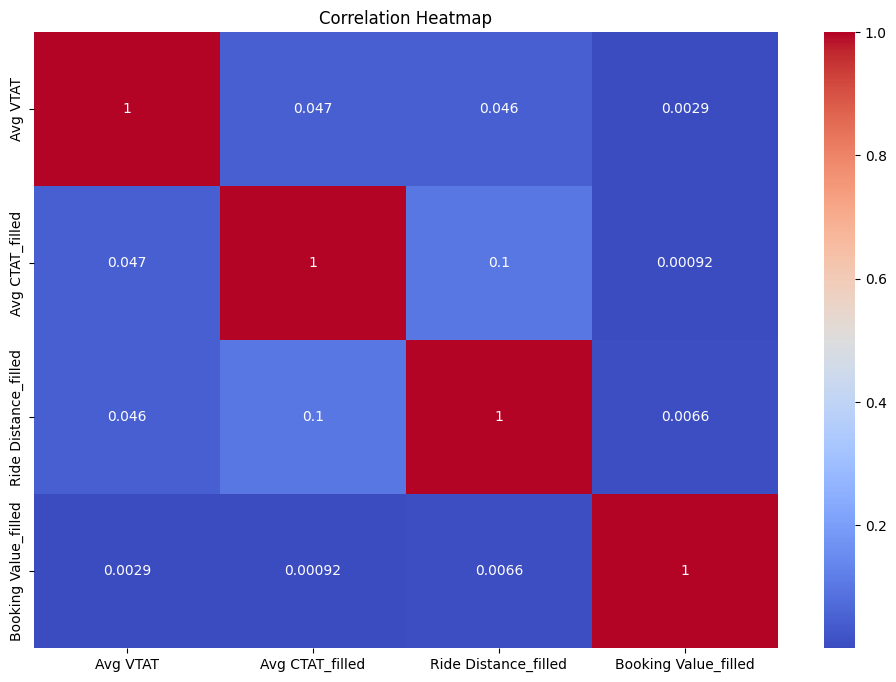

In [45]:
col_num =  ["Avg VTAT", "Avg CTAT_filled", "Ride Distance_filled", "Booking Value_filled", "Book_Hour"]
plt.figure(figsize=(12, 8))
sns.heatmap(x_train_cardinal[col_num_cont].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

dari heatmap, tidak terlihat adanya korelasi antara kolom tersebut.

In [46]:
x_train_selection = x_train_cardinal.drop(["Book_Hour"], axis=1)
x_test_selection = X_test.drop(["Book_Hour"], axis=1)
x_train_selection.head()

,Vehicle Type,Avg VTAT,Avg CTAT_filled,Ride Distance_filled,Booking Value_filled
93686,Go Sedan,8.6,32.35,20.38,1274.0
70149,Go Mini,8.9,28.90,23.99,429.0
90104,Go Sedan,10.6,41.40,29.32,436.0
102032,Go Sedan,3.5,15.90,15.11,84.0
23444,Auto,5.7,25.10,29.91,1538.0


hasil selection disimpan pada variable baru yaitu ```x_train_selection``` dan ```x_test_selection```

## Handling Outliers

In [47]:
def outliers_checker(data, list_cols):
    '''
    Mengecek distribusi, skewness, batas atas/bawah, outlier, 
    serta menambahkan mean, median, std, min, max.
    '''

    # variable kosong
    result = []

    for col in list_cols:
        row = []

        # add nama kolom
        row.append(col)

        # hitung skewness
        skewness = data[col].skew()
        row.append(skewness)

        # check normalitas
        if np.abs(skewness) > 1:
            skew_cat = 'extreme skew'
        elif np.abs(skewness) > 0.5:
            skew_cat = 'skew'
        else:
            skew_cat = 'normal'
        row.append(skew_cat)

        # upper dan lower boundaries
        if skew_cat == 'normal':
            upper = data[col].mean() + 3 * data[col].std()
            lower = data[col].mean() - 3 * data[col].std()
        elif skew_cat == 'skew':
            iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
            upper = data[col].quantile(0.75) + 1.5 * iqr
            lower = data[col].quantile(0.25) - 1.5 * iqr
        else:
            iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
            upper = data[col].quantile(0.75) + 3 * iqr
            lower = data[col].quantile(0.25) - 3 * iqr

        # add upper and lower boundaries
        row.append(round(upper, 2))
        row.append(round(lower, 2))

        # check outliers exists or not
        if len(data.loc[(data[col] < lower) | (data[col] > upper)]) > 0:
            row.append('has outliers')
            row.append(round(len(data.loc[(data[col] < lower) | (data[col] > upper)]) / len(data) * 100, 2))
        else:
            row.append('no outlier')
            row.append(0.0)

        # tambahkan statistik tambahan
        row.append(round(data[col].mean(), 2))   # mean
        row.append(round(data[col].median(), 2)) # median
        row.append(round(data[col].std(), 2))    # std
        row.append(round(data[col].min(), 2))    # min
        row.append(round(data[col].max(), 2))    # max

        result.append(row)

    result = pd.DataFrame(result, columns=[
        'nama kolom', 'skewness', 'skewness category', 
        'upper boundary', 'lower boundary', 
        'outliers status', 'outlier pct (in %)',
        'mean', 'median', 'std', 'min', 'max'
    ])
    return result

buat function untuk melakukan validasi apakah kolom perlu dilakukan handling outliers

Penanganan Outlier

beberapa variable yang digunakan untuk menilai outlier : 
- Distribusi (skewness) → apakah distribusinya normal atau skewed. 
    - Batas umum: |skewness| < 0.5 ≈ normal, 0.5–1 = skew, >1 = extreme skew.
- Persentase outlier → apakah jumlahnya kecil (bisa di-retain) atau besar (perlu trimming/capping).
    - ```< 1%``` biasanya aman retain.
    - 1–5% bisa dipertimbangkan capping.
    - ```> 5%``` besar kemungkinan perlu capping atau trimming.

1. Trimming Outliers Dilakukan dengan menghapus nilai-nilai di luar batas tertentu. Cocok diterapkan jika terdapat nilai yang secara logika tidak masuk akal atau salah input, seperti umur 0 tahun.

2. Retaining Outliers Outlier dipertahankan jika nilai-nilainya masih dalam rentang yang masuk akal dan tidak terlalu jauh dari rata-rata. Misalnya, variabel pace dengan nilai antara 0–100 masih dapat dianggap valid.

3. Capping (Winsorizing) Digunakan ketika trimming tidak ideal dan retaining berisiko menurunkan performa model. Nilai-nilai ekstrem akan diubah ke batas bawah atau batas atas yang ditentukan, sehingga distribusi data menjadi lebih stabil. Dipakai jika terdapat data dengan nilai ekstrem dari batas bawah dan atas.

In [48]:
# checking distribution and upper, lower boundaries
list_cols_to_outlier = ["Avg VTAT", "Avg CTAT_filled", "Ride Distance_filled", "Booking Value_filled"]

# check
outliers_checker(x_train_selection, list_cols_to_outlier)

,nama kolom,skewness,skewness category,upper boundary,lower boundary,outliers status,outlier pct (in %),mean,median,std,min,max
0,Avg VTAT,0.308846,normal,19.77,-2.87,has outliers,0.14,8.45,8.20,3.77,2.0,20.0
1,Avg CTAT_filled,0.047690,normal,53.80,4.49,no outlier,0.00,29.15,28.90,8.22,10.0,45.0
2,Ride Distance_filled,0.140293,normal,63.32,-14.10,no outlier,0.00,24.61,23.99,12.90,1.0,50.0
3,Booking Value_filled,2.372392,extreme skew,1839.67,-916.00,has outliers,0.89,505.56,429.00,363.77,50.0,4277.0


1. Vehicle Type adalah kolom kategorikal numerik, jadi tidak perlu dihitung outlier

2. Avg VTAT, Avg CTAT_filled, dan Ride Distance_filled 
    - skewness di kategori normal, sehingga tidak perlu dilakukan handling outliers.

3. Booking Value_filled, Outlier 9.87%, skewness 5.993600
    - skewness di kategory extreme skew, namun presentase outlier sangat sedikit 0.89%
    - terlihat perbedaan jauh antara Booking Value_filled terbanyak dengan rata-rata. Max = 4277.0, rata-rata = 505.56.
    - dikarenakan presentase data sangat sedikit, maka tidak perlu dilakukan handling outliers

## Feature Scaling

In [49]:
scaler = StandardScaler()
col_num_cont_scaler = ["Avg VTAT", "Avg CTAT_filled", "Ride Distance_filled", "Booking Value_filled"]

Avg VTAT, Avg CTAT_filled, Ride Distance_filled, dan Booking Value_filled adalah kolom numerik kontinu, maka kita gunakan StandartScaler untuk menormalkan data numerik agar memiliki rata-rata 0 dan standar deviasi 1

## Feature Encoding

In [50]:
ohe = OneHotEncoder(handle_unknown="ignore")
col_cat_ohe = ["Vehicle Type"]

Vehicle Type adalah kolom kategorial numerik, maka kita gunakan OneHotEncoder untuk mengubah variabel kategorikal menjadi bentuk numerik biner (0/1).

## FE Pipeline

In [51]:
num_pipe = Pipeline([("scaler", scaler)])
cat_pipe = Pipeline([("ohe", ohe)])

col_trans = ColumnTransformer([
    ("num", num_pipe, col_num_cont_scaler),
    ("cat", cat_pipe, col_cat_ohe)
])

Pipeline ini akan dibuat dengan ColumnTransformer : 
- num_pipe: untuk kolom numerik kontinu, dilakukan scaling dengan StandardScaler.
- cat_pipe: untuk kolom kategorikal, dilakukan encoding dengan OneHotEncoder.

Dengan pipeline ini, scaling dan encoding bisa dilakukan secara otomatis dan konsisten baik pada training maupun inference.

# 6. Model Definition

In [52]:
model_dectree = make_pipeline(
    col_trans, 
    DecisionTreeClassifier(random_state=7, class_weight="balanced")
    )
model_knn = make_pipeline(
    col_trans,
    KNeighborsClassifier()
)
model_svm = make_pipeline(
    col_trans,
    SVC(kernel="linear", class_weight="balanced", random_state=7)
)
model_rf = make_pipeline(
    col_trans,
    RandomForestClassifier(random_state=7, class_weight="balanced")
)

model_xgb = make_pipeline(
    col_trans,
    XGBClassifier(
        n_estimators=300, 
        learning_rate=0.1, 
        max_depth=5, 
        random_state=7, 
        scale_pos_weight=1
    )
)

### Decision Tree
Model Non-linear, berbasis aturan (rule-based). Membagi data secara rekursif berdasarkan threshold fitur untuk memaksimalkan pemisahan kelas. Dapat menangani hubungan non-linear & interaksi fitur. Hasil lebih mudah dijelaskan lewat diagram pohon
- Kelebihan:
    - Mampu menangkap hubungan non-linear dan interaksi antar fitur.
    - Tidak butuh scaling/normalisasi data.
    - Bisa menangani missing value (terbatas).
- Kekurangan:
    - Mudah overfitting jika tidak di-pruning.
    - Kurang interpretatif jika pohon terlalu besar.

### K-Nearest Neighbors (KNN)
Model berbasis instance-based learning. Prediksi kelas ditentukan oleh mayoritas label dari k tetangga terdekat (berdasarkan jarak, biasanya Euclidean).
- Kelebihan:
    - Sederhana & intuitif.
    - Tidak perlu asumsi distribusi data.
    - Bisa menangkap pola non-linear.
- Kekurangan:
    - Lambat pada dataset besar (harus hitung jarak ke semua titik).
    - Sensitif terhadap scaling data (butuh normalisasi).
    - Pemilihan k sangat berpengaruh.

### Support Vector Machine (SVM)
Model berbasis margin. Mencari hyperplane yang memaksimalkan jarak (margin) antara kelas. Bisa diperluas dengan kernel trick untuk hubungan non-linear.
- Kelebihan:
    - Bagus untuk data high-dimensional.
    - Bisa menangkap pola non-linear (dengan kernel).
    - Relatif robust terhadap outlier.
- Kekurangan:
    - Training lambat di dataset besar.
    - Sulit dituning (C, gamma, kernel).
    - Hasil lebih sulit dijelaskan ke non-teknis.

### Random Forest
Ensemble dari banyak Decision Tree, hasil voting (klasifikasi) atau rata-rata (regresi). Membantu mengurangi overfitting yang terjadi pada single tree.
- Kelebihan:
    - Lebih stabil & generalisasi lebih baik dibanding single tree.
    - Menangani non-linear & interaksi fitur.
    - Memberikan feature importance.
- Kekurangan:
    - Lebih lambat daripada single tree.
    - Interpretabilitas berkurang (sulit divisualkan semua pohon).

### Boosting (contoh: Gradient Boosting / XGBoost / AdaBoost)
Metode ensemble sequential: membangun model secara bertahap, tiap model baru memperbaiki kesalahan model sebelumnya.
- Kelebihan:
    - Sering memberi performa sangat baik (state-of-the-art di banyak kompetisi).
    - Lebih kuat terhadap overfitting dibanding single tree.
    - Bisa meng-handle interaksi kompleks antar fitur.
- Kekurangan:
    - Training lebih lambat.
    - Banyak hyperparameter yang harus dituning.
    - Interpretasi lebih sulit dibanding single tree.

kita akan menggunakan XGBoost karena lebih cocok untuk dataset yang besar, dan lebih kuat dari Gradient Boosting

dengan ```class_weight="balanced"``` model otomatis menghitung bobot tiap kelas, sehingga kelas minoritas akan diberi bobot yang lebih tinggi.

# 7. Model Training

In [53]:
# Train the model
model_dectree.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT',
                                                   'Avg CTAT_filled',
                                                   'Ride Distance_filled',
                                                   'Booking Value_filled']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=7))])

In [54]:
# Train the model
model_knn.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT',
                                                   'Avg CTAT_filled',
                                                   'Ride Distance_filled',
                                                   'Booking Value_filled']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [55]:
# Train the model
model_svm.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT',
                                                   'Avg CTAT_filled',
                                                   'Ride Distance_filled',
                                                   'Booking Value_filled']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear',
                     random_state=7))])

In [56]:
# Train the model
model_rf.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT',
                                                   'Avg CTAT_filled',
                                                   'Ride Distance_filled',
                                                   'Booking Value_filled']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=7))])

In [57]:
# Train the model
model_xgb.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT',
                                                   'Avg CTAT_filled',
                                                   'Ride Distance_filled',
                                                   'Booking Value_filled']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, ca...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=7, ...))])

Train LogistikRefression dan DesicionTreeClassifier

### Cross Validation

In [62]:
# cross validate Decision Tree
result_dectree = cross_validate(model_dectree, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_dectree)

,fit_time,score_time,test_score,train_score
0,0.936051,0.025664,0.610058,1.0
1,0.869523,0.024917,0.616781,1.0
2,0.969820,0.030468,0.612478,1.0
3,1.043506,0.029054,0.617453,1.0
4,0.846193,0.023415,0.618881,1.0


In [ ]:
# cross validate KNN
result_knn = cross_validate(model_knn, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_knn)

,fit_time,score_time,test_score,train_score
0,0.492549,2.443277,0.555600,0.666353
1,0.357829,2.263978,0.550760,0.669278
2,0.489008,3.589178,0.552911,0.665311
3,0.315690,2.109490,0.547398,0.670286
4,0.314432,2.308124,0.550968,0.667104


In [ ]:
# cross validate SVM
result_svm = cross_validate(model_svm, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_svm)

In [ ]:
# cross validate Random Forest
result_rf = cross_validate(model_rf, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_rf)

In [ ]:
# cross validate Boosting
model_xgb = cross_validate(model_xgb, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(model_xgb)

untuk Cross Validation, kita gunakan Recall karena lebih berbahaya jika prediksi menjadi false negatif (terdeteksi tidak cancel, tapi sebenarnya cancel) dibandingkan false positif (terdeteksi cancel, tapi sebenarnya tidak cancel).

#### Decision Tree
- Train = 1, Test = 0.61. Model overfitting, pohon tumbuh terlalu dalam (mampu mengklasifikasikan semua data training dengan sempurna).
- Perlu hypertunning:
    - max_depth, min_samples_split, min_samples_leaf.

Logistic Regression: tidak cukup menangkap pola.

# 8. Model Evaluation

In [59]:
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return "Good"
    elif 0.8 <= roc_auc <= 0.9:
        return "Fair"
    elif 0.7 <= roc_auc < 0.8:
        return "Decent"
    elif 0.6 <= roc_auc < 0.7:
        return "Not Great"
    else:
        return "Poor"

def evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba):
    # calculate metrics
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    print("Train Set Metrics:")
    print("Recall   :", recall_train)
    print("Precision:", precision_train)
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    print(f"ROC-AUC  : {roc_auc_train} {evaluate_roc_auc(roc_auc_train)}" )

    recall_test = recall_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    print("\nTest Set Metrics:")
    print("Recall   :", recall_test)
    print("Precision:", precision_test)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC  : {roc_auc_test} {evaluate_roc_auc(roc_auc_test)}" )

    metrics_before = {
        "Recall_Train": recall_train,
        "Precision_Train": precision_train,
        "ROC_AUC_Train": roc_auc_train,
        "Recall_Test": recall_test,
        "Precision_Test": precision_test,
        "ROC_AUC_Test": roc_auc_test
    }
    return metrics_before

Teknik evaluasi (metrics) yang dipakai

1. Recall :
    - Mengukur seberapa banyak prediksi positif yang benar-benar positif.
    - Cocok ketika kesalahan negatif palsu (false negative) lebih kritis.
    - Sangat penting kalau tujuan bisnis, penting untuk tahu jika user diprediksikan tidak cancel booking tetapi sebenarnya cancel booking. 
2. Precision :
    - Mengukur seberapa banyak prediksi positif yang benar-benar positif.
    - Cocok ketika kesalahan positif palsu (false positive) lebih kritis.
2. ROC-AUC : 
    - Mengukur kemampuan model membedakan kelas positif dan negatif secara keseluruhan.
    - Semakin tinggi nilai AUC, semakin baik model dalam membedakan kelas.


### Evaluasi Logistic Regression

Recall 
train : 0.099, test : 0.100
- Model hanya bisa menangkap ~10% transaksi yang benar-benar cancel. Sangat rendah.

Precision
train : 0.523, test : 0.525
- ketika model memprediksi cancel, hanya 52% yang benar-benar cancel. Cukup lumayan, tapi karena recall rendah, model jadi hampir tidak berguna untuk deteksi cancel.

ROC-AUC 
train : 0.617, test 0.620
- hanya sedikit lebih baik dari Precision. Indikasi model tidak bisa membedakan pola cancel vs selesai dengan baik.

### Evaluasi Decision Tree

In [60]:
# predictions
y_train_pred = model_dectree.predict(x_train_selection)
y_test_pred  = model_dectree.predict(x_test_selection)

# predicted probabilities (for ROC-AUC)
y_train_proba = model_dectree.predict_proba(x_train_selection)[:, 1]
y_test_proba  = model_dectree.predict_proba(x_test_selection)[:, 1]

metrics_dectree_before = evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba)

ValueError: columns are missing: {'Avg CTAT_filled', 'Booking Value_filled', 'Ride Distance_filled'}

Recall 
train : 0.999, test : 0.662
- Model overfitting, masih lebih baik dari pada logistic regression

Precision
train : 1.0, test : 0.640
- Model overfitting, tidak jauh berbeda dari recall.

ROC-AUC 
train : 0.999, test 0.737
- Model overfitting, model menghafal data train, kategori decent, artinya model punya kemampuan membedakan cancel vs selesai lebih baik daripada Logistic Regression

Walaupun ada overfitting di train, performa test set masih jauh lebih baik daripada Logistic Regression. Recall cukup tinggi, cocok jika tujuan bisnis adalah mendeteksi lebih banyak cancel (early warning) meski dengan sedikit false positive.

# 9. Hyperparameter Tuning

## i. Hyperparameter Tuning - Training

Untuk Hyperparameter Tuning pada model Logistic Regression akan dilakukan menggunakan Grid Search

GridSearch :
- Kelebihan : 
    - Sangat sistematis → pasti mengeksplor semua kombinasi.
    - Bagus untuk parameter space kecil.
- Kekurangan:
    - Boros waktu & komputasi kalau kombinasi parameter banyak (eksplosif).
    - Bisa menghabiskan waktu lama untuk dataset besar.

### Tuning Logistic Regression

kita coba tuning Logistik Regression

dari hasil tuning didapatkan nilai paling bagus ada pada kombinasi `'c': 0.01`, `'solver': 'saga'`

### Tuning Decision Tree

In [ ]:
# parameter grid untuk Decision Tree
param_grid_dt = {
    "decisiontreeclassifier__max_depth": [ 3, 5, 7, 10, None],  # kedalaman pohon
    "decisiontreeclassifier__min_samples_split": [2, 3, 5, 10, 20],  # minimal sampel untuk split
    "decisiontreeclassifier__min_samples_leaf": [1, 2, 5, 10, 20],  # minimal sampel di tiap daun
}

# Grid Search dengan 5-fold cross-validation
grid_search_dt = GridSearchCV(
    estimator=model_dectree,          # pipeline yang berisi DecisionTreeClassifier
    param_grid=param_grid_dt,
    cv=5,
    scoring="roc_auc",              # recall dipakai supaya fokus ke deteksi cancel
    n_jobs=-1,
    verbose=2
)

In [ ]:
# fit ke data train
grid_search_dt.fit(x_train_selection, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Avg '
                                                                          'VTAT',
                                                                          'Avg '
                                                                          'CTAT_filled',
                                                                          'Ride '
                                                                          'Distance_filled']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Vehicle '
                                                                          'Type'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=7))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [3, 5, 7, 10,
                                                               None],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 5,
                                                                      10, 20],
                         'decisiontreeclassifier__min_samples_split': [2, 3, 5,
                                                                       10,
                                                                       20]},
             scoring='roc_auc', verbose=2)

In [ ]:
# cek hasil
cv_result = pd.DataFrame(grid_search_dt.cv_results_)
cv_result.sort_values(by= 'rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__min_samples_leaf,param_decisiontreeclassifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
79,0.979035,0.022645,0.049795,0.009379,10,1,20,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.835832,0.837027,0.840931,0.836331,0.838429,0.837710,0.001832,1
84,0.990577,0.052985,0.054633,0.016590,10,2,20,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.835902,0.837069,0.841134,0.836313,0.837887,0.837661,0.001864,2
78,1.009574,0.038298,0.056450,0.006558,10,1,10,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.835524,0.836777,0.840890,0.836132,0.838297,0.837524,0.001919,3


dari hasil tuning didapatkan nilai paling bagus ada pada kombinasi `'max_depth': 10`, `'min_samples_leaf': '1'`, `'min_samples_split': '20'`

nilai tersebut adalah nilai default masing-masing parameter pada decision tree

In [ ]:
# fit hasil tuning
best_model_dt = grid_search_dt.best_estimator_
best_model_dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT',
                                                   'Avg CTAT_filled',
                                                   'Ride Distance_filled']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=20,
                                        random_state=7))])

## ii. Hyperparameter Tuning - Evaluation

### Evaluation Logistic Regression

Dari grafik dan angka, performa nyaris sama. Tidak ada peningkatan signifikan setelah hyperparameter tuning.

- Recall dan ROC-AUC antara train dan test hampir sama → model tidak overfitting maupun underfitting berlebihan. Artinya Logistic Regression memang model yang cukup stabil di dataset ini.
- Recall ≈ 0.54 → hanya berhasil mendeteksi sekitar 54% kasus positif.
- ROC-AUC ≈ 0.62 → kemampuan membedakan kelas masih relatif rendah (idealnya >0.70).
- Jadi walau stabil, prediktif power masih terbatas.
- Logistic Regression tidak punya banyak hyperparameter yang bisa sangat memengaruhi performa (umumnya C, penalty, solver).

- Kelebihan Model
    - Sederhana & stabil → performa train vs test konsisten.
    - Interpretable → mudah menjelaskan variabel mana yang berpengaruh.

- Kekurangan
    - Recall & ROC-AUC masih rendah → artinya masih banyak kasus positif yang terlewat.
    - Tidak cukup fleksibel untuk menangkap hubungan non-linear yang kompleks.

### Evaluation Decision Tree

In [ ]:
# predictions
y_train_pred = best_model_dt.predict(x_train_selection)
y_test_pred  = best_model_dt.predict(x_test_selection)

# predicted probabilities (for ROC-AUC)
y_train_proba = best_model_dt.predict_proba(x_train_selection)[:, 1]
y_test_proba  = best_model_dt.predict_proba(x_test_selection)[:, 1]

metrics_dectree_after = evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba)

perform_dectree_eval = pd.DataFrame({
    "Model": ["Before", "After"],
    "Recall Train": [metrics_dectree_before['Recall_Train'], metrics_dectree_after['Recall_Train']],
    "Recall Test": [metrics_dectree_before['Recall_Test'], metrics_dectree_after['Recall_Test']],
    "ROC_AUC Train": [metrics_dectree_before['ROC_AUC_Train'], metrics_dectree_after['ROC_AUC_Train']],
    "ROC_AUC Test": [metrics_dectree_before['ROC_AUC_Test'], metrics_dectree_after['ROC_AUC_Test']],
})


Train Set Metrics:
Recall   : 0.8322665662650602
Precision: 0.5830915325771564
ROC-AUC  : 0.8452349549895068 Fair

Test Set Metrics:
Recall   : 0.827286389008158
Precision: 0.5790818243294011
ROC-AUC  : 0.8373727038332859 Fair


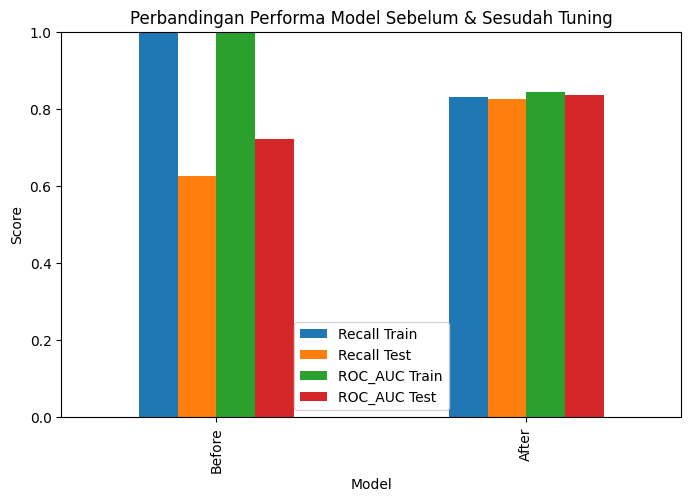

In [ ]:
perform_dectree_eval.set_index("Model")[["Recall Train","Recall Test","ROC_AUC Train","ROC_AUC Test"]].plot(kind="bar", figsize=(8,5))
plt.title("Perbandingan Performa Model Sebelum & Sesudah Tuning")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

- Overfitting Berkurang
    - Sebelum tuning, Decision Tree sangat overfit (train 100%, test jauh lebih rendah).
    - Setelah tuning, performa train dan test seimbang → artinya tuning berhasil mengontrol kompleksitas pohon (max_depth, min_samples_split, min_samples_leaf).

- Recall Tinggi (0.83)
    - Model mampu mendeteksi 83% kasus positif → bagus untuk use case deteksi pembatalan booking.
    - Precision memang hanya 0.58, artinya masih ada cukup banyak false positive, tapi trade-off ini wajar bila tujuan utamanya mengurangi miss-cancellation.

- ROC-AUC 0.84 (Fair–Good)
    - Model punya kemampuan diskriminasi yang baik dalam membedakan cancel vs non-cancel.
    - Ini meningkat signifikan dibanding hasil sebelum tuning.

- Kelebihan Model
    - Generalization baik → performa train dan test konsisten.
    - Recall tinggi → sesuai dengan target deteksi kasus pembatalan.
    - ROC-AUC cukup bagus (0.84) → model bisa membedakan kelas dengan baik.
    - Lebih stabil dibanding versi sebelum tuning.

- Kekurangan
    - Precision sedang (0.58) → masih cukup banyak false positive (prediksi cancel padahal tidak).

## iii. Best Model Desicion

Kita putuskan untuk menggunakan Decision Tree karena :

1. Recall Tinggi (≈0.83)
- Model mampu mendeteksi sebagian besar kasus pembatalan (positif class).
- Recall yang tinggi penting untuk use case ini, karena lebih baik memprediksi terlalu banyak “potensi cancel” daripada melewatkan cancel sebenarnya.

2. Generalization Baik (Tidak Overfit)
- Sebelum tuning, Decision Tree overfit (train ≈ 1.0, test jauh lebih rendah).
- Setelah tuning, performa train & test seimbang → model bisa generalisasi dengan baik ke data baru.

3. ROC-AUC Cukup Bagus (≈0.84)
- Menunjukkan model punya kemampuan diskriminasi yang solid dalam membedakan cancel vs non-cancel.
- Lebih tinggi dibanding Logistic Regression (≈0.62).

4. Lebih Baik daripada Logistic Regression
- Logistic Regression stabil, tapi recall & ROC-AUC rendah (~0.54 & ~0.62).
- Decision Tree unggul signifikan di recall dan ROC-AUC.

5. Interpretabilitas Tinggi
- Decision Tree mudah dijelaskan → bisa dilihat variabel apa yang paling berpengaruh (feature importance).
- Cocok untuk diskusi dengan tim bisnis/marketing yang butuh insight jelas.

# 9. Model Saving

In [ ]:
# Save the Files

with open('model_akhir.pkl', 'wb') as file_1:
  pickle.dump(best_model_dt, file_1)

# 10. Model Inferencing

Untuk inferencing akan dikerjakan pada P1M2_jyotis_sugata_inf.ipynb

# 11. Pengambilan Kesimpulan